# **GRIP - THE SPARKS FOUNDATION**        
### January 2021
### **Chaitali Vasudeo Narkhede**

**TASK 1 - Prediction using Supervised ML**                                          
Predict the percentage of an student based on the number of study hours using Simple Linear Regression model.                                 
Also predict the percentage of the student if he/she studies 9.25 hrs/day.

### Step 1 - Importing all libraries

In [ ]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")


# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

###Step 2 : Reading and Understanding Data

In [ ]:
#Imporing data from url and check head of data
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Number of rows and columns in the data
data.shape

(25, 2)

In [ ]:
#data type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Summary of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for Null values in the data

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No Null values found

###Step 3 : Exploratory Data Analysis
1. Univariate Analysis

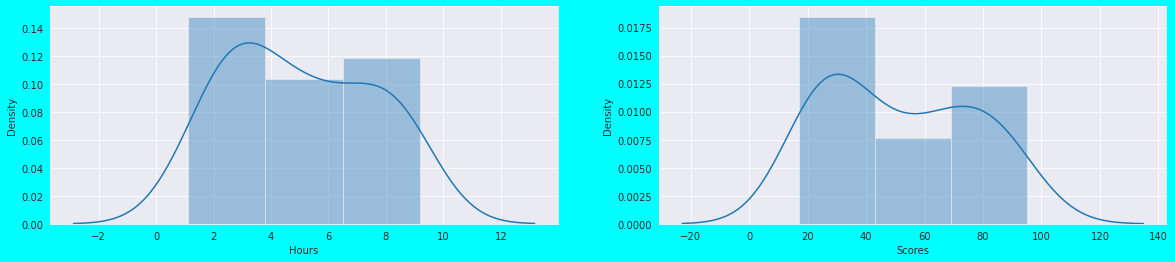

In [ ]:
plt.figure(figsize=(20,4), facecolor='cyan')
sns.set_style(style='darkgrid')
plt.subplot(1,2,1)
sns.distplot(data.Hours)
plt.subplot(1,2,2)
sns.distplot(data.Scores)
plt.show()

Insight :
The student generally spends 2 to 4 hrs/day in study and scores in between 20-40.

Outlier Analysis

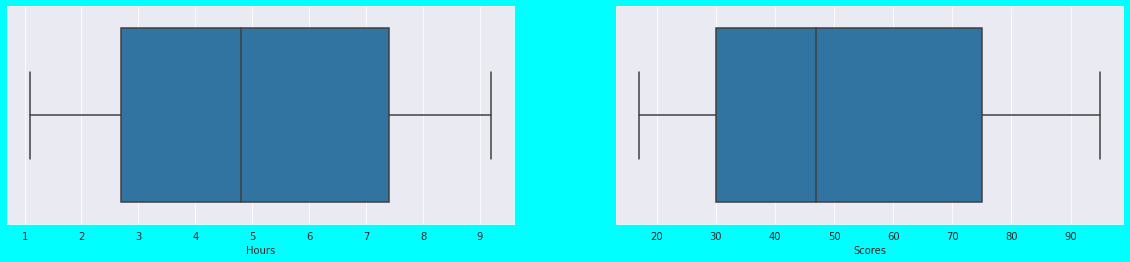

In [ ]:
plt.figure(figsize=(20,4), facecolor='cyan')
plt.subplot(1,2,1)
sns.boxplot(data.Hours)
plt.subplot(1,2,2)
sns.boxplot(data.Scores)
plt.show()

Insight :
There is no outlier in the data.

2. Bivariate Analysis

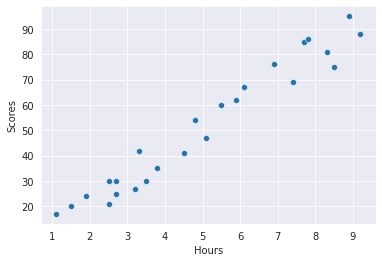

In [ ]:
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.show()

Insight :
It can be seen from the above graph that study hours per day and score secured in exam are linearly dependent. If you study more, you will get more score.

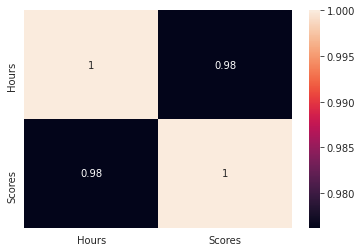

In [ ]:
sns.heatmap(data.corr(), annot = True)
plt.show()

Insight :
Study Hours are highly correlated to Scores

###Step 4 : Splitting data into train and test data sets
Below, the data is splitted; 45% of the data for training and 55% for testing.

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.45, test_size = 0.55, random_state = 10)

Dividing into X and Y sets for the model building

In [ ]:
y_train = data.Scores
X_train = data.Hours
print("Training complete.")

Training complete.


### Step 5: Building a linear model                                                      
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [ ]:
X_train_sm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_sm).fit()
lr1.params

const    2.483673
Hours    9.775803
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           9.13e-17
Time:                        10:34:25   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3


Insight :
P value of 'Hours' is 0 R-squared value of the model obtained from train data are 0.953.

R-squared is a statistical measure of how close the data are to the fitted regression line.

As the regression is based on single feature, we can don't consider the Adjusted R-squared value i.e.0.951.

Adjusted R-squared value is used in case of multiple feature to add penality for considering higher number of features for learning and increasing the complexity of the model.

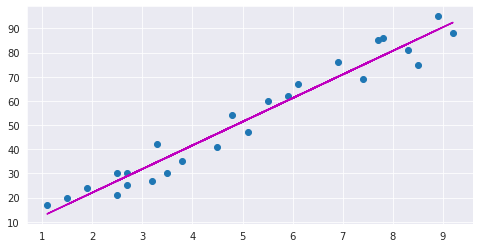

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[8,4])
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 2.4837 + 9.7758*X_train_sm.iloc[:, 1], 'm')
plt.show()

###Step 6 : Making Predictions

In [ ]:

# Making predictions on y_train using the model
y_train_pred = lr1.predict(X_train_sm)
y_train_pred.head()

0    26.923182
1    52.340271
2    33.766244
3    85.578002
4    36.698985
dtype: float64

In [ ]:
data_train = pd.DataFrame({'Actual':y_train,'Predicted':y_train_pred})
data_train.head()

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985


In [ ]:
#Prediction on test data
X_test = df_test['Hours']
y_test = df_test['Scores']

In [ ]:

y_test.shape

(14,)

In [ ]:
# Adding constant variable to test dataframe
X_test_ml = sm.add_constant(X_test)

# Making predictions using the model
y_pred_ml = lr1.predict(X_test_ml)
y_pred_ml

5     17.147378
1     52.340271
13    34.743825
2     33.766244
12    46.474789
19    74.824618
14    13.237057
7     56.250592
11    60.160913
22    39.631726
3     85.578002
23    69.936717
6     92.421065
18    62.116074
dtype: float64

In [ ]:
data_test = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ml})
data_test

,Actual,Predicted
5,20,17.147378
1,47,52.340271
13,42,34.743825
2,27,33.766244
12,41,46.474789
19,69,74.824618
14,17,13.237057
7,60,56.250592
11,62,60.160913
22,35,39.631726


Visualization of Linear Regression Model on Test data

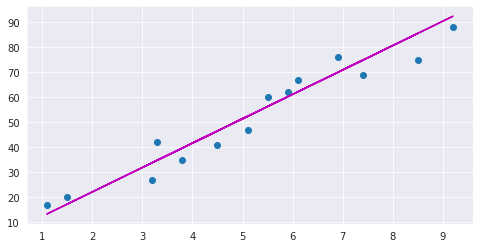

In [ ]:
plt.figure(figsize=[8,4])
plt.scatter(X_test_ml.iloc[:, 1], y_test)
plt.plot(X_test_ml.iloc[:, 1], 2.4837 + 9.7758*X_test_ml.iloc[:, 1], 'm')
plt.show()

###Step 7 : Model Evaluation on Test Data

In [ ]:
#R-squared value
test_r2 = round(r2_score(y_true=y_test, y_pred=y_pred_ml),2)
print('R2 Score of Test Datasets is:',test_r2)

R2 Score of Test Datasets is: 0.93


In [ ]:
#Model evaluation using RMSE & RMAE values
MSE = round(mean_squared_error(y_test,y_pred_ml),2)
MAE = round(mean_absolute_error(y_test,y_pred_ml),2)
print("Mean Squared Error of Test Data :", MSE)
print("Mean Absolute Error of Test Data :", MAE)
print()
print("Root Mean Squared Error of Test Data :", round(math.sqrt(MSE),2))
print("Root Mean Absolute Error of Test Data :", round(math.sqrt(MAE),2))

Mean Squared Error of Test Data : 31.72
Mean Absolute Error of Test Data : 5.25

Root Mean Squared Error of Test Data : 5.63
Root Mean Absolute Error of Test Data : 2.29


###Prediction with Unknown value

In [ ]:
# What will be predicted score if a student studies for 9.25 hrs/ day
time = 9.25
hours = sm.add_constant(pd.DataFrame({'Hours':[time]}),has_constant='add')
score = lr1.predict(hours)
print("If a students studies for {0} hours per day, his/her predicted score will be {1}%".format(time,round(score[0],2)))

If a students studies for 9.25 hours per day, his/her predicted score will be 92.91%


## **Conclusion**                                                         
I was succesfully able to carry out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameter.

## **Thank You**